# Parte 1: Filtros gaussianos


In [1]:
# Librerías principales
import numpy as np
import cv2 as cv
import matplotlib
from matplotlib import pyplot as plt

# Tipo de visualización
%matplotlib inline

# Versiones de librerías
print("".join(f"{x[0]}: {x[1]}\n" for x in [
    ("Numpy",np.__version__),
    ("openCV",cv.__version__),
    ("Matplotlib",matplotlib.__version__),
]))

Numpy: 1.22.3
openCV: 4.5.5
Matplotlib: 3.5.1



## Imágenes
Se levantan la imágenes que se empleará como prueba del la función. Para la prueba se trabajará en escala de grises.


In [2]:
# Definición de la ruta para levantar las imagenes
PATH = r'D:\Profesion\Disciplinas\vision_computadora_I\practicas\tp_2\data'

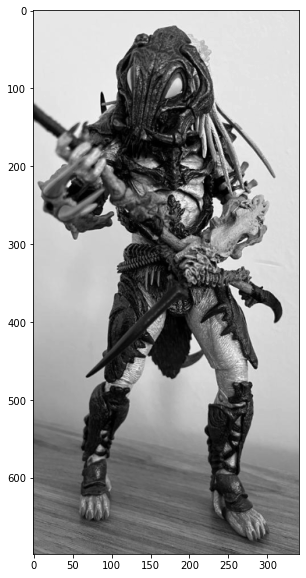

Dimensiones de las imágenes (698, 341)


In [3]:

img = cv.imread(os.path.join(PATH, 'fft_alfa_pred.png'))

# Trabajaremos en escala de grises
img = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

# Verificación si ha levantado las imágenes con los canales correctos y coincide con las originales
fig = plt.figure(figsize=(12, 10))

plt.imshow(img, cmap='gray')
plt.show()

# Verificación de dimensiones y canales
print(f'Dimensiones de las imágenes {img.shape}')


## Función de filtrado gaussiano

In [4]:
def mod_graph(image):
  '''
  Función que devuelve el logaritmo del valor absoluto de la transformada de Fourier. Se usa para mostrar imagen
  '''
  return 20*np.log(np.abs(image))

In [5]:
def create_gauss_filter(h, w, k_size, sigma):
    '''
    Función que devuelve tres elementos: el kernel del filtro guassiano, el filtro gaussiano en la dimensión de la imagen y el mismo
    en el dominio espectral
    h: altura de la imagen.
    w: ancho de la imagen.
    k_size: tamaño del filtro (número impar)
    sigma: valor de la varianza de la distribución gaussiana del filtro
    '''

    # Kernel gaussiano: composición a partir de partes separables iguales para que sea cuadrado
    Kg_x = cv.getGaussianKernel(k_size, sigma) 
    Kg_y = cv.getGaussianKernel(k_size, sigma) 
    Kg = np.dot(Kg_x,Kg_y.T)

    # Definición del centro de la imagen
    C = [int(h/2), int(w/2)]

    # Definición de coordenadas para ubicar el kernel en el centro del canvas
    start_point = [C[1]-int(Kg.shape[1]/2), C[0]-int(Kg.shape[0]/2)]
    end_point = [C[1]+int(Kg.shape[1]/2), C[0]+int(Kg.shape[0]/2)]

    # Definición del canvas
    canvas = np.zeros((h, w))
    filter_g = cv.rectangle(canvas, start_point, end_point, int(255), thickness=-1)

    # Reemplazo del centro del canvas con el kernel gaussiano
    idx = np.where(filter_g==255)
    mask_Kg = Kg.flatten()
    filter_g[idx] = mask_Kg

    # Aplicación de la transformada rápida de Fourier en su forma "shift"
    filter_g_fft = np.fft.fftshift(np.fft.fft2(filter_g))

    return Kg, filter_g, filter_g_fft

## Procesamiento

In [6]:
# Parámétros para crear el filtro
h, w = img.shape
ksize = 9
sigma = 1.5

# Creación del filtro
Kg, filter_g, filter_g_fft = create_gauss_filter(h, w, ksize, sigma)

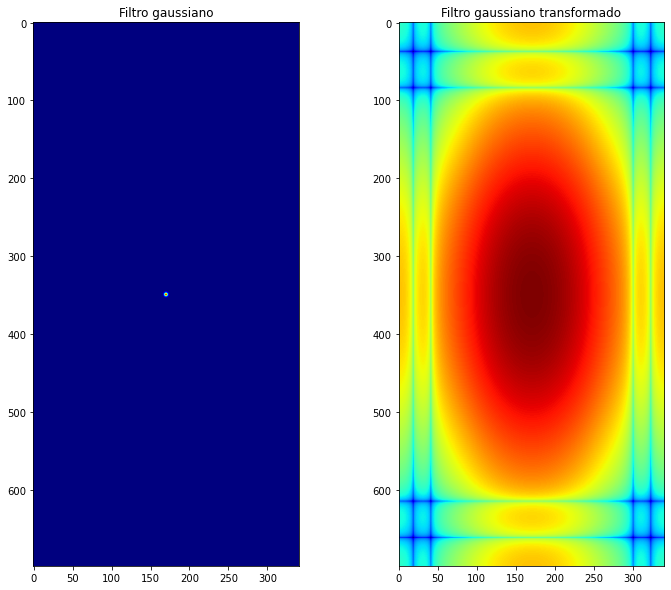

In [7]:
# Verificación si ha levantado las imágenes con los canales correctos y coincide con las originales
fig = plt.figure(figsize=(12, 10))

ax1=plt.subplot(121)
ax1.imshow(filter_g, cmap='jet')
ax1.set_title('Filtro gaussiano')

ax2=plt.subplot(122)
ax2.imshow(mod_graph(filter_g_fft), cmap='jet')
ax2.set_title('Filtro gaussiano transformado')

plt.show()

In [8]:
# Transformación de la imagen aplicando la transformada rápida de Fourier
img_fft = np.fft.fftshift(np.fft.fft2(img))

# Filtrado espectral
filtered_fft = img_fft*filter_g_fft
img_filt_fft = np.fft.ifftshift(np.abs(np.fft.ifft2(filtered_fft)))

# Filtrado convolucional
img_filt_gauss = cv.filter2D(img, -1, Kg)

## Resultados y conclusiones
El filtrado espectral presenta un degradado levemente mayor al convolucional. Tener en cuenta que en el primer caso no se aplica padding, como si lo hace el algoritmo de opencv al realizar la convolución.

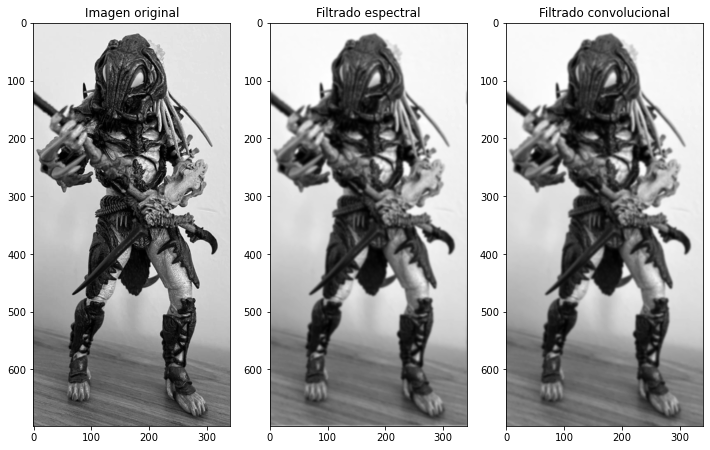

In [9]:
fig = plt.figure(figsize=(12, 10))

ax1=plt.subplot(131)
ax1.imshow(img, cmap='gray')
ax1.set_title('Imagen original')


ax2=plt.subplot(132)
ax2.imshow(img_filt_fft, cmap='gray')
ax2.set_title('Filtrado espectral')


ax3=plt.subplot(133)
ax3.imshow(img_filt_gauss, cmap='gray')
ax3.set_title('Filtrado convolucional')

plt.show()